# Examples of the commands to manipulate and plot data loaded as tplot variables

 

In [ ]:
!pip install pyspedas    ## Install the PySPEDAS module unless already have. 
# After the installation, you may be asked to restart the runtime.

## Load some datasets of the ERG satellite

The following commands are to import some necessary modules (pyspedas and pytplot) and then load some datasets obtained by the ERG satellite for 12:00 UT on 26 Mar. 2017 through 12:00 UT on 27 Mar. 2017

In [ ]:
import pyspedas
import pytplot
from pytplot import tplot
from pytplot import options

tr = ['2017-03-26 12:00:00', '2017-03-27 12:00:00']
pyspedas.erg.mepe( trange=tr )
pyspedas.erg.mgf( trange=tr )
pyspedas.erg.pwe_ofa( trange=tr )
pyspedas.erg.pwe_hfa( trange=tr, level='l3' )
pyspedas.erg.orb( trange=tr )

## Obtain the list of loaded tplot variables

`tplot_names()` gives a list containing all the tplot variables that have been saved on memory.

In [ ]:
vars = pytplot.tplot_names()

## Set the plot period and plot the data!

`timespan()` sets a time period for which loaded data are plotted by tplot().

This function takes two arguments: the first one is the start time of the plot and the second is the plot duration. 

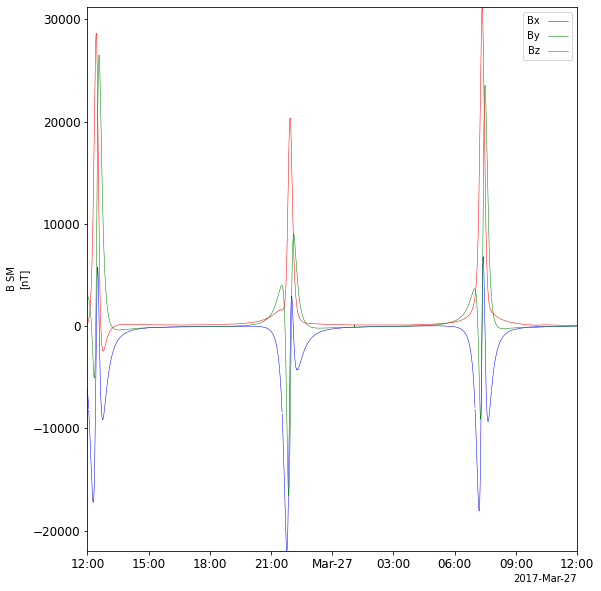

In [65]:
pytplot.timespan( tr[0], 1, keyword="days" )
tplot(['erg_mgf_l2_mag_8sec_sm'])

`timespan()` takes either of days, hours, minutes, seconds for "keyword". 
The following example sets a 3-hour plot period using "hours". 

`xsize` and `ysize` keywords are used to resize the entire plot to a designated size and aspect ratio. For example, xsize=12 is to set the horizontal size of a plot to 12 [inches]. If none of them is given, the default size ([xsize, ysize] = [8, 10]) is used. 

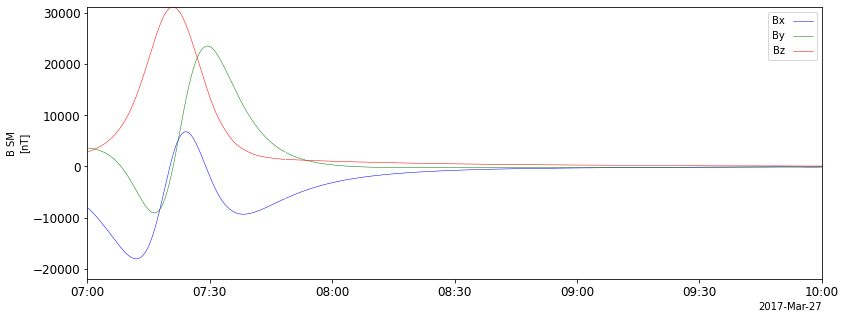

In [66]:
pytplot.timespan( '2017-03-27 07:00:00', 3, keyword='hours')
tplot(['erg_mgf_l2_mag_8sec_sm'], xsize=12, ysize=5 )

`xsize` and `ysize` keywords regulate the horizontal and vertical size of a plot generated by tplot(). 

## Add an additional x-axis

The folowing commands load the orbit data and add Lm values to the plot as an additional x-axis using "var_label" keyword. 

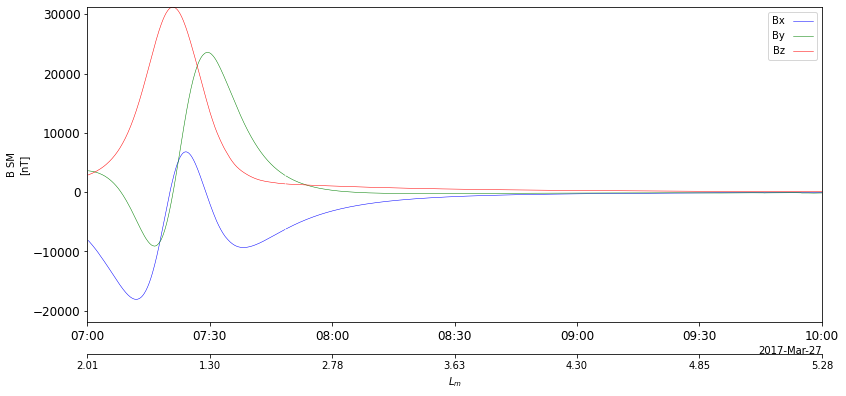

In [67]:
pytplot.split_vec( 'erg_orb_l2_pos_Lm' )
pytplot.options('erg_orb_l2_pos_Lm_x', 'ytitle', '$L_m$')
var_labels = ['erg_orb_l2_pos_Lm_x']
tplot(['erg_mgf_l2_mag_8sec_sm'], xsize=12, ysize=6, var_label=var_labels )

## Plot multiple tplot variables

`tplot()` can take an array of tplot variables to plot them all at once by stacking vertically. 

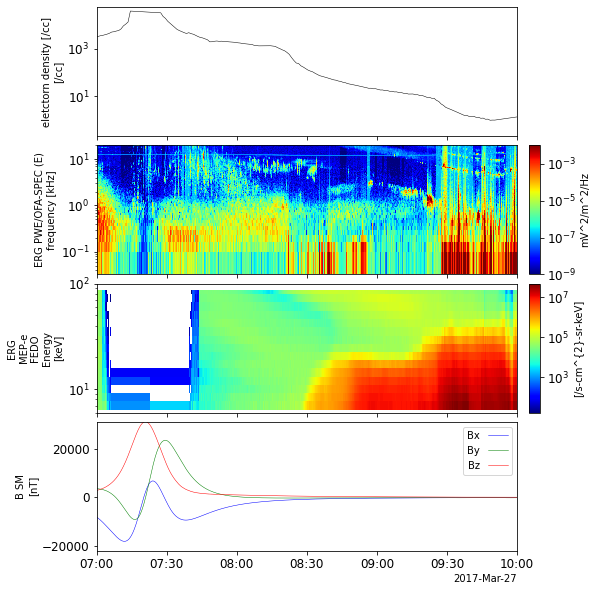

In [68]:
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

## Update plot metadata

Similar to IDL/SPEDAS, you can add some "attributes" to tplot variables so that the resultant plot panels are decorated nicely. The following example changes attributes `ytitle`, `ztitle`, and `ysubtitle` to show designated labels to y-axes and color scales. Tplot() accepts the mathematical expressions of LaTex, enabling to show, for example, suffixes. 

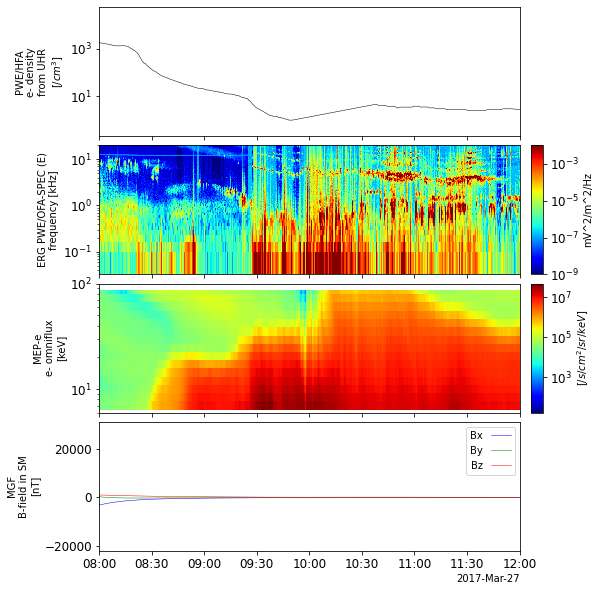

In [69]:
from pytplot import options   # As a shortcut
options('erg_mgf_l2_mag_8sec_sm', 'ytitle', 'MGF\nB-field in SM')
options('erg_mepe_l2_omniflux_FEDO', 'ytitle', 'MEP-e\ne- omniflux')
options('erg_mepe_l2_omniflux_FEDO', 'ztitle', '[$/s/cm^2/sr/keV$]')
options('erg_pwe_hfa_l3_1min_ne_mgf','ytitle', 'PWE/HFA\ne- density\nfrom UHR' )
options('erg_pwe_hfa_l3_1min_ne_mgf','ysubtitle', '[$/cm^3$]' )

pytplot.timespan( '2017-03-27 08:00:00', 4, keyword='hours')
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

If `ylog` is set to be True, a plot panel is drawn with a log-scale vertical axis. If set to be False, then the vertical axis is changed to a linear axis.  

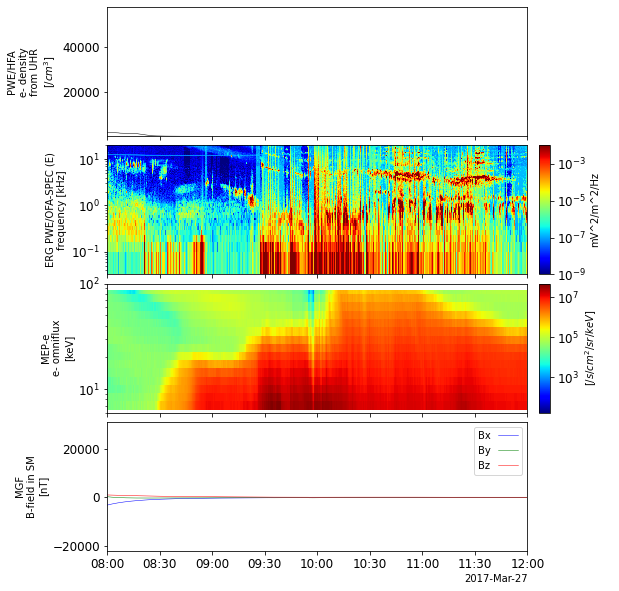

In [70]:
options('erg_pwe_hfa_l3_1min_ne_mgf','ylog', False )  # to a linear scale
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

`yrange` attribute holds the lower and upper limits of a vertical axis. 

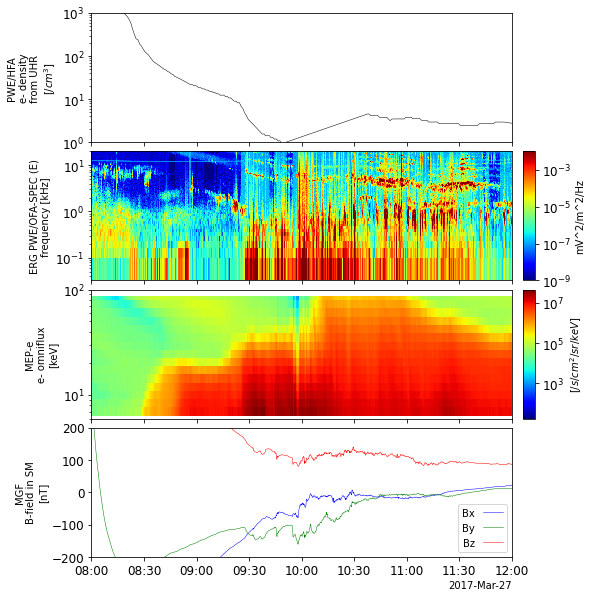

In [71]:
options('erg_pwe_hfa_l3_1min_ne_mgf','ylog', True )  # back to a log scale
options('erg_mgf_l2_mag_8sec_sm', 'yrange', [-200,200])
options('erg_pwe_hfa_l3_1min_ne_mgf', 'yrange', [1e0,1e3])
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

### Change the color bar
You can choose any of the colormaps available for matplotlib. See the website below for a list:
https://matplotlib.org/3.6.0/tutorials/colors/colormaps.html

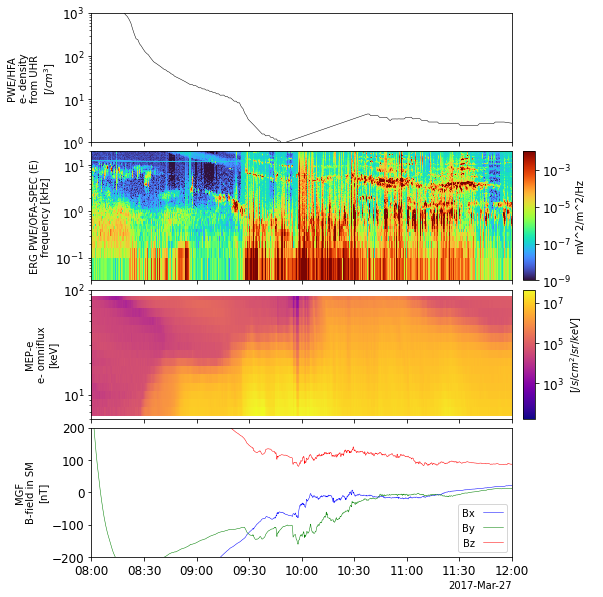

In [72]:
options('erg_mepe_l2_omniflux_FEDO', 'colormap', 'plasma' )
options('erg_pwe_ofa_l2_spec_E_spectra_132', 'colormap', 'turbo' )
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_pwe_ofa_l2_spec_E_spectra_132','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

## Change the colors of line plots

You can set the colors of lines in a plot panel using `color` attribute. 

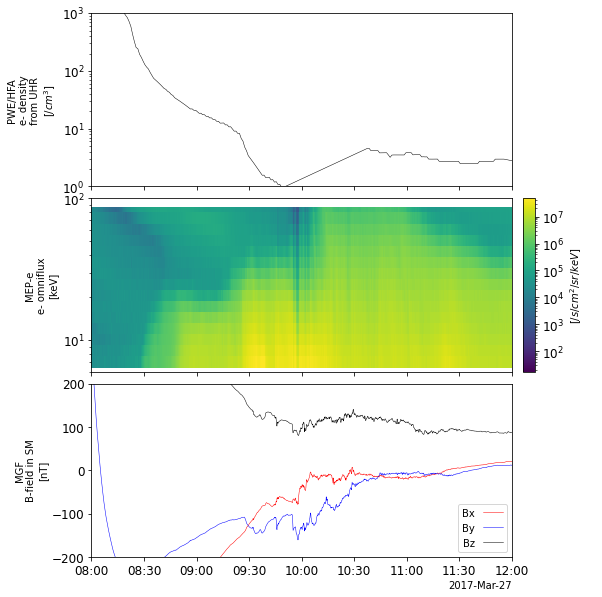

In [73]:
options('erg_mepe_l2_omniflux_FEDO', 'colormap', 'viridis' )  ## chage the colormap for MEP-e data again. 
options('erg_mgf_l2_mag_8sec_sm', 'color', ['red','blue','black'])
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

## Change the legends of line plots

Setting a string array to `legend_names` allows you to show legends as you want. 

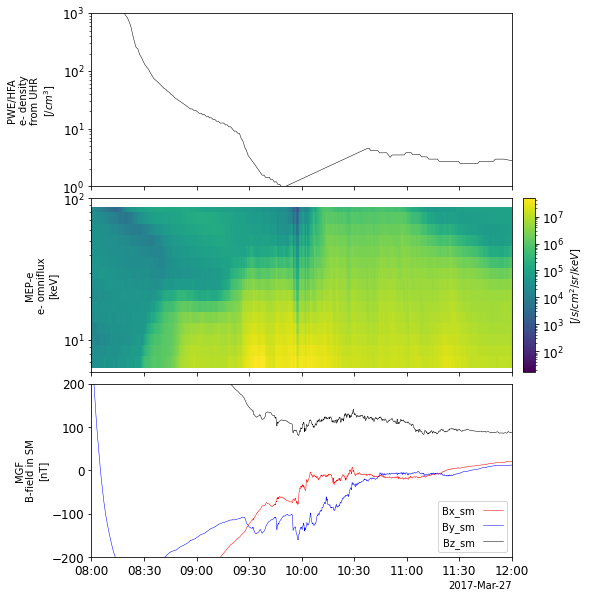

In [74]:
options('erg_mgf_l2_mag_8sec_sm', 'legend_names', ['Bx_sm','By_sm','Bz_sm'])
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

Setting `zrange` changes the color scale range for spectrum-type plots. 

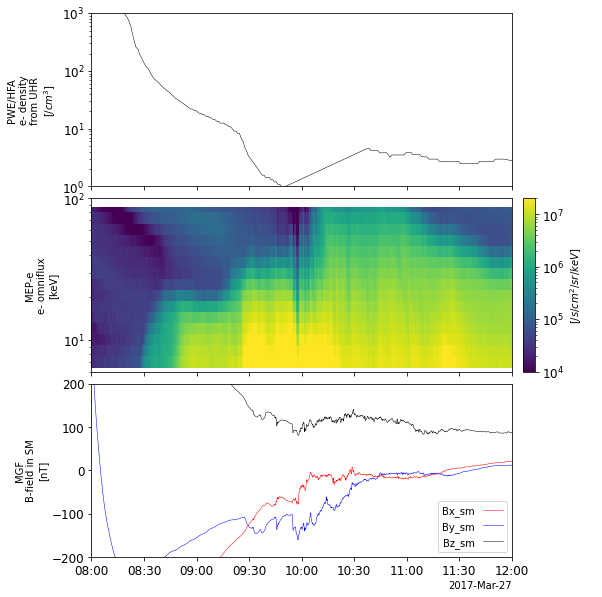

In [75]:
options('erg_mepe_l2_omniflux_FEDO', 'zrange', [1e4,2e7] )
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

You can create a semi-tranparent plot panel by setting `alpha` attribute. 


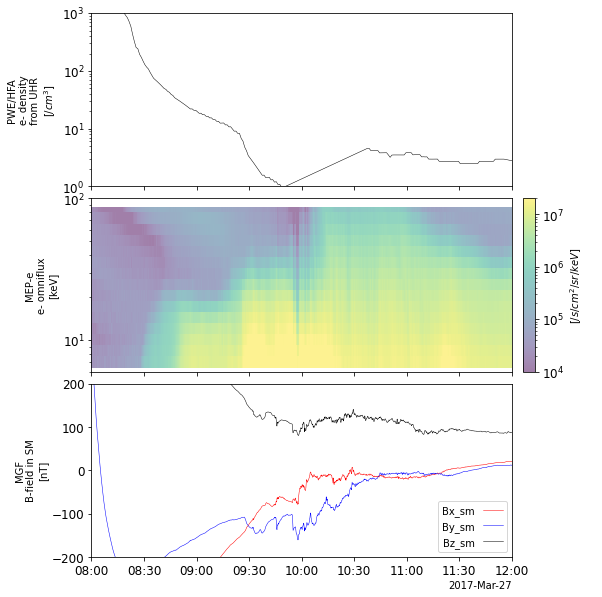

In [76]:
options('erg_mepe_l2_omniflux_FEDO', 'alpha', 0.5 )
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

By setting `marker` attribute to a character, you can put that character at all plot values.  

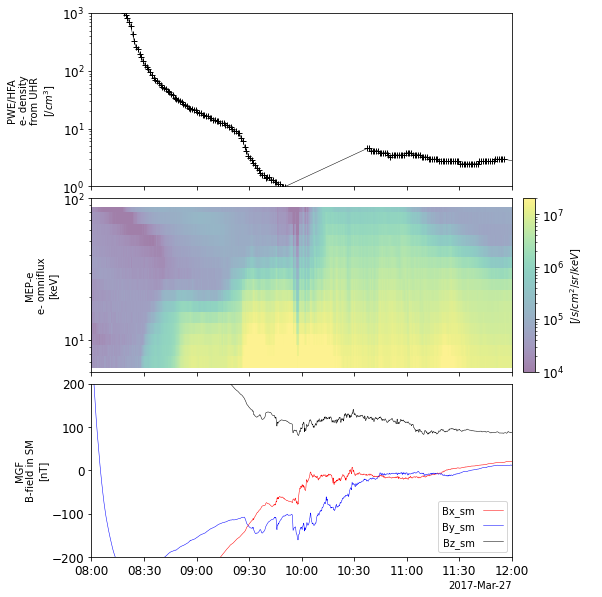

In [77]:
options('erg_pwe_hfa_l3_1min_ne_mgf', 'marker', '+')
tplot(['erg_pwe_hfa_l3_1min_ne_mgf','erg_mepe_l2_omniflux_FEDO','erg_mgf_l2_mag_8sec_sm'])

## Overplot lines on spectra

You can overlay lines over a spectrum-type plot by creating a **combined tplot variable**. 

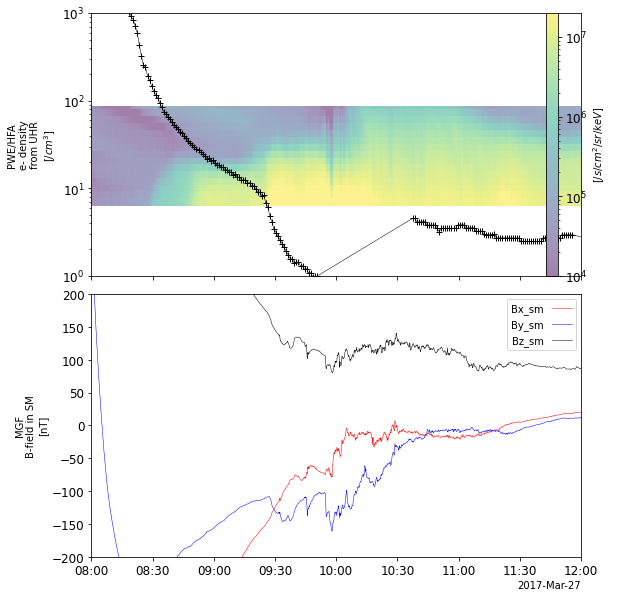

In [78]:
pytplot.store_data('mepe_hfa_combined', data='erg_mepe_l2_omniflux_FEDO erg_pwe_hfa_l3_1min_ne_mgf')
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm'])

The combined panel looks awkward. The following commands improve the panel by drawing the two y-axes separately. 

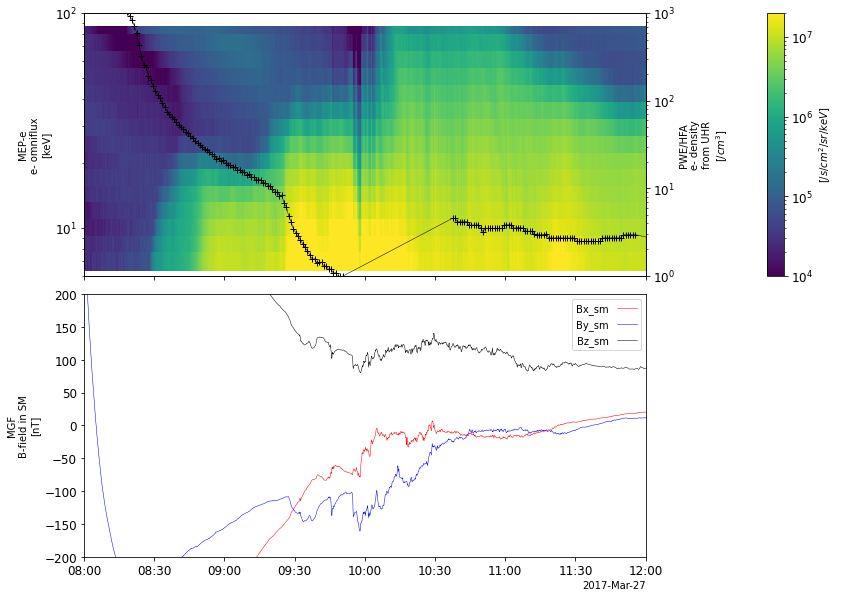

In [79]:
options('erg_mepe_l2_omniflux_FEDO', 'alpha',1.0)
options('mepe_hfa_combined', 'right_axis', True)
from pytplot import tplot_options
tplot_options('xmargin', [0.1, 0.25])    ## Default: [0.1, 0.05]
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm'], xsize=12)

## Add legends to a plot panel and chage the color of a line plot

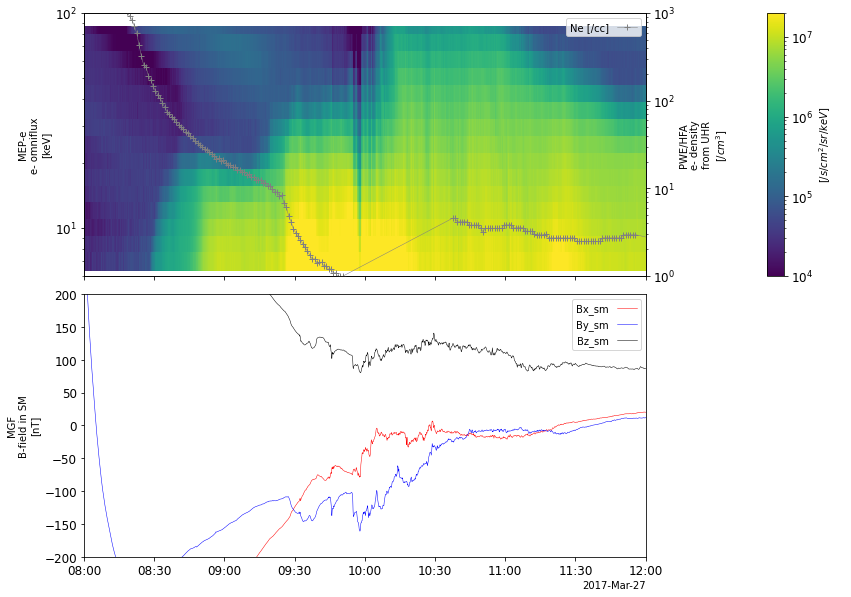

In [80]:
options('erg_pwe_hfa_l3_1min_ne_mgf','legend_names', 'Ne [/cc]')
options('erg_pwe_hfa_l3_1min_ne_mgf','color', 'grey')
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm'], xsize=12)

## Add a plot title to a figure

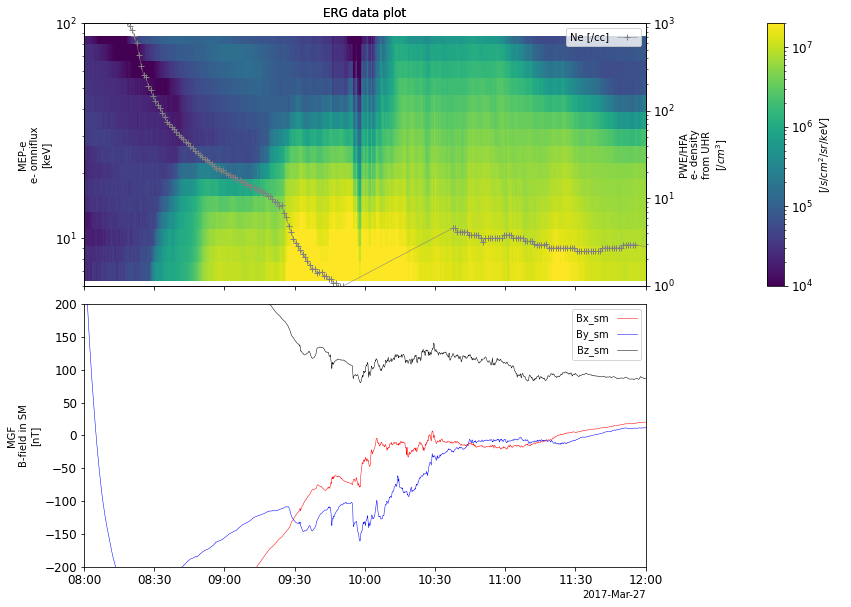

In [81]:
pytplot.tplot_options('title', 'ERG data plot')
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm'], xsize=12)




---

## Variable attributes modified with `pytplot.options()`

|  Options  |  Value type  |  Notes  |
|  :----     |  :----        |  :----    |
|  color    |  str/list	 |  red, green, blue, etc. Also takes in RGB tuples, i.e. (0,255,0) for green  |
|  colormap  |  str/list  | the name of the colormap used for drawing a plot panel. <br>e.g., "spedas", "viridis", "jet", "turbo", "plasma", ...<br>The list of colormaps is available at https://matplotlib.org/examples/color/colormaps_reference.html.  |
|  Spec      |  int	       |  1 sets the Tplot Variable to spectrogram mode, 0 reverts.  |
|  Alt     |  int          |  1 sets the Tplot Variable to altitude plot mode, 0 reverts.  |
|  Map      |  int         |  1 sets the Tplot Variable to latitude/longitude mode, 0 reverts.  |
|  link     |  list        |  Allows a user to reference one tplot variable to another.  |
|  ylog     |  int         |  1 sets the y axis to log scale, 0 reverts.
|  zlog    |  int          |  1 sets the z axis to log scale, 0 reverts (spectrograms only).  |
|  legend_names  |  list   |  A list of strings that will be used to identify the lines.  |
|  xlog_slice  |  bool     |  Sets x axis on slice plot to log scale if True.  |
|  ylog    |  bool         |  Set y axis on main plot window to log scale if True.  |
|  ylog_slice  |  bool     |  Sets y axis on slice plot to log scale if True.  |
|  zlog    |  bool         |  Sets z axis on main plot window to log scale if True.  |
|  line_style  |  str      |  scatter (to make scatter plots), or solid_line, dot, dash, dash_dot, dash_dot_dot_dot, long_dash.  |
|  marker  |  str          | If a character is set, that is put at each data point in a plot panel. Some popular characters for this purpose would be "+", "*", "-", "o", and so on.<br>`marker_size` attribute controls the size of markers; a larger number for it gives markers with a larger size.  |
|  char_size  |  int       |  Defines character size for plot labels, etc. The default size is 14. |
|  name    |  str           |The title of the plot.  |
|  panel_size  |  flt      |  Number between [0,1], representing the percent size of the plot.  |
|  basemap  |  str         |  Full path and name of a background image for “Map” plots.  |
|  alpha    |  flt          |  Number between [0,1], gives the transparancy of the plot lines.  |
|  thick   |  flt           |  Sets plot line width.  |
|  yrange  |  flt list     |  Two numbers that give the y axis range of the plot.  |
|  zrange  |  flt list     |  Two numbers that give the z axis range of the plot.  ||
|  xrange_slice  |  flt list  |  Two numbers that give the x axis range of spectrogram slicing plots.  |
|  yrange_slice  |  flt list  |  Two numbers that give the y axis range of spectrogram slicing plots.  |
|  ytitle  |  str           |  Title shown on the y axis.  |
|  ztitle  |  str           |  Title shown on the z axis. Spec plots only.  |
|  ysubtitle  |  str        |  Subtitle shown on the y axis.  |
|  zsubtitle  |  str        |  Subtitle shown on the z axis. Spec plots only.  |
|  plotter  |  str          |  Allows a user to implement their own plotting script in place of the ones herein. |
|  crosshair_x  |  str      |  Title for x-axis crosshair.  |
|  crosshair_y  |  str      |  Title for y-axis crosshair.  |
|  crosshair_z  |  str      |  Title for z-axis crosshair.  |
|  static    |  str         |  Datetime string that gives desired time to plot y and z values from a spec plot.  |
|  static_tavg  |  str      |  Datetime string that gives desired time-averaged y and z values to plot from a spec plot.  |
|  t_average  |  int        |  Seconds around which the cursor is averaged when hovering over spectrogram plots.  |
|  spec_plot_dim  |  int   |  If a variable is time x two dimensions (3-D or more in total), this sets which dimension<br> the variable will have on on the y axis. All other dimensions are summed into this one.  |
|  border     |  bool      | If set to False, no plot axes are drawn.  |
|  right_axis  |  bool     | If set to True for a combined tplot variable, it draws the second y-axis with ticks and labels on the right border of a plot panel.  |
|  xtickcolor  |  str      | The color with which ticks on the x-axis (time axis) are drawn. (But this option does not seem to work for the matplotlib-based tplot()? ) |
|  xtick_direction  |  str  |  The direction of x-axis's ticks, either of "in", "out", or "inout".   |
|  xtick_length  |  flt     | The length of x-axis's ticks.  | 
|  xtick_width  |  flt      | The horizontal width of x-axis's ticks.  |
|  xtick_labelcolor  |  str  |  The color of labels put on the x-axis.  | 

* ytickcolor, ytick_direction, ytick_length, ytick_width, ytick_labelcolor are available but for modifying ticks and labels for the y-axis. 





---
## Some global attributes affecting the entire plot, set with `pytplot.tplot_options()`
Shown below are some frequently-used global options for the generated plots. A complete list of the global plot attributes is available at https://pytplot.readthedocs.io/en/latest/tplot_options.html. 


|  Options  |  Value type  |  Notes  |
|  :----    |  :----       |  :----  |
|  title  |  str           |  Title of the entire plot  |
|  title_size  |  int      |  Font size of the output    |
|  var_label   |  str/list  |  Name(s) of the tplot variables to be used as another x-axis  |
|  data_gap    |  flt      |  Number of seconds with consecutive NaN values allowed before no interpolation should occur.  |
|  vertical_spacing  |  flt  |  The vertical space (in pixel) between two plots. Detault is 0.07.  |
|  show_all_axes     |  bool  |  If set False, only the bottom axis, that is, time axis of the plot is drawn. Default is True.  |
|  black_background  |  bool  |  If set True, it makes plot backgrounds black with white text.  (Default: white background w/ black text)  |
|  axis_font_size  |  int     | The font size of the axis ticks. Default is 10.  |
|  xmargin    | [flt, flt]  | The two-element array sets the left and right margins of the plot. Default is [0.10, 0.05].  | 



---





# Apply various filters to time series data
The pyspedas module provides some methods with which you can calculate boxcar-average, running-average of a given data. 

## Calculate boxcar agerages of data
`avg_data()` calculates boxcar averages with a given time width. The following command derives a boxcar average of data for each 64 s period.

avg_data was applied to: erg_mgf_l2_mag_8sec_sm-avg


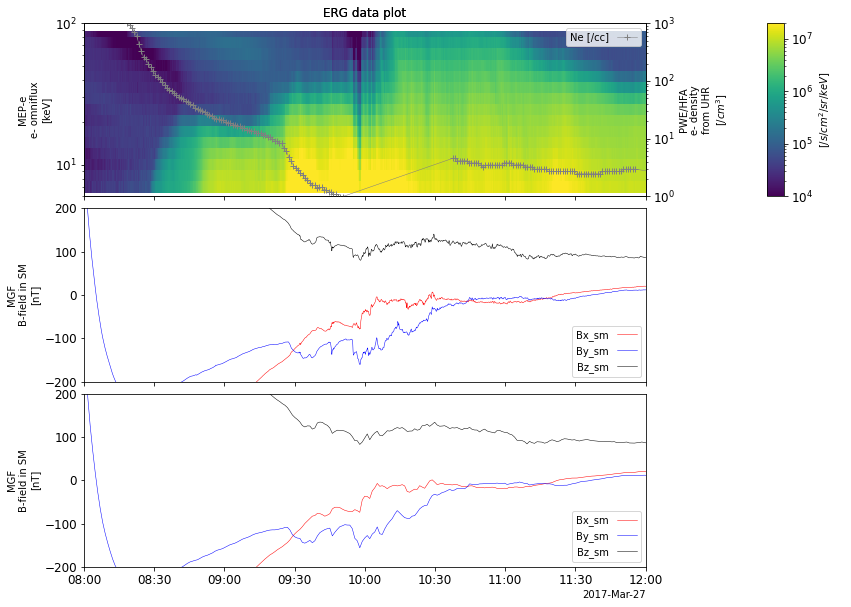

In [82]:
pyspedas.avg_data('erg_mgf_l2_mag_8sec_sm', 64)
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_mag_8sec_sm-avg'], xsize=12)

## Running average, equivalent to applying a low-pass filter to data
`tsmooth()` calculates time-averages with a sliding window having a width in data point given as `width` keyword. 

The following example essentially derived a low-pass filtered time series from the original data. 

erg_mgf_l2_mag_8sec_sm copied to erg_mgf_l2_mag_8sec_sm-s
tsmooth was applied to: erg_mgf_l2_mag_8sec_sm-s


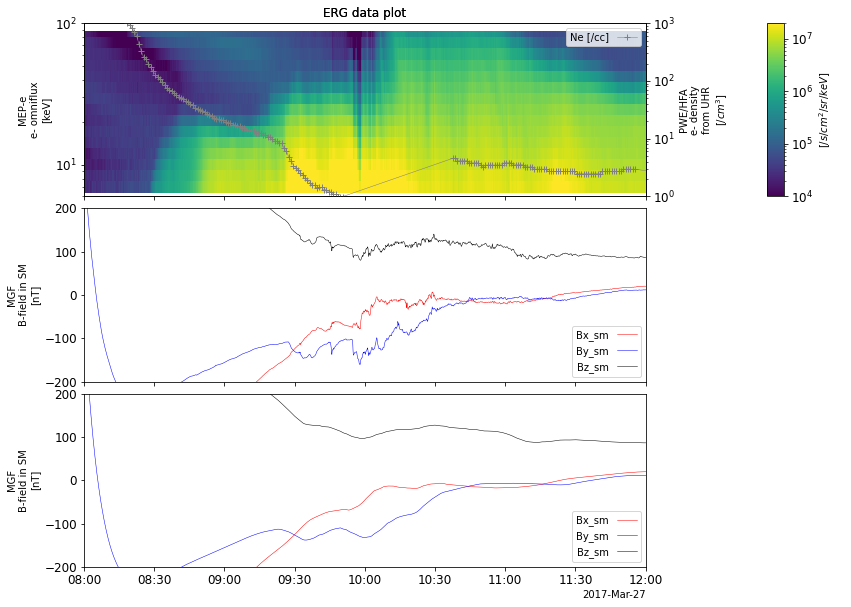

In [83]:
## The MGF Lv.2 8 s data has 8-s values. "width=8*10" means that it calculates the running average with a time window of ~8 s * 8 * 10 = 640 s. 
pyspedas.tsmooth( 'erg_mgf_l2_mag_8sec_sm', width=8*10)  
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_mag_8sec_sm-s'], xsize=12)

## Generate a high-pass-filtered data

`tplot_math.subtract()` create a new tplot variable containing the difference between one tplot variable and another. By subtracting a low-pass-filtered time series from the original data, you can derive a essentially high-pass-filtered time series. 


`tplot_math` has many submodules that carry out various mathematical calculations of tplot variables. The list of the submodules is available at https://pytplot.readthedocs.io/en/latest/math_routines.html. 

In [84]:
pytplot.tplot_math.subtract( 'erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_mag_8sec_sm-s', 'erg_mgf_hpf_640s')


'erg_mgf_hpf_640s'

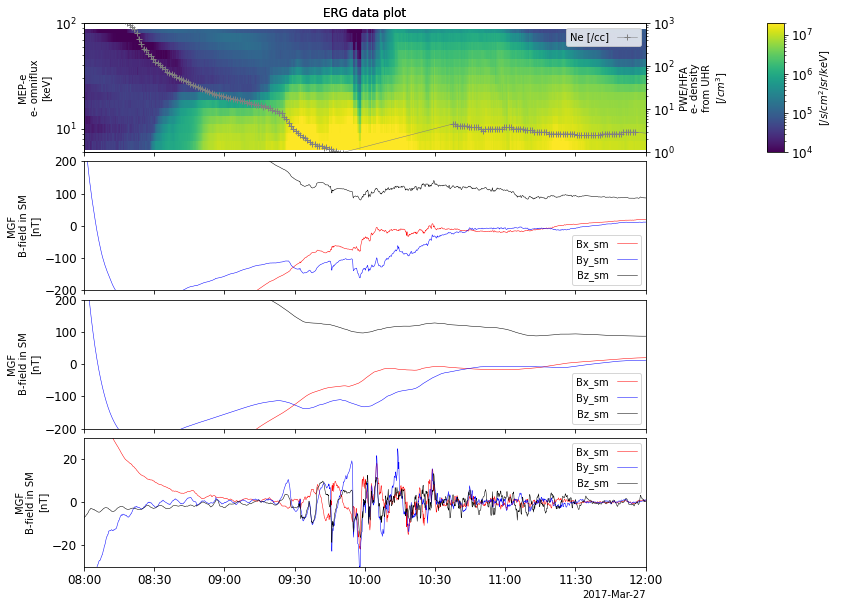

In [85]:
options('erg_mgf_hpf_640s', 'yrange', [-30, 30])
tplot(['mepe_hfa_combined','erg_mgf_l2_mag_8sec_sm','erg_mgf_l2_mag_8sec_sm-s','erg_mgf_hpf_640s'], xsize=12)

### Separate a tplot variable containing vector values into that of each component
For this purpose, you can use `split_vec()`. 

`join_vec()` has the opposite functionality: it combines multiple tplot variables containing scalar values into a single variable with the vector values. 

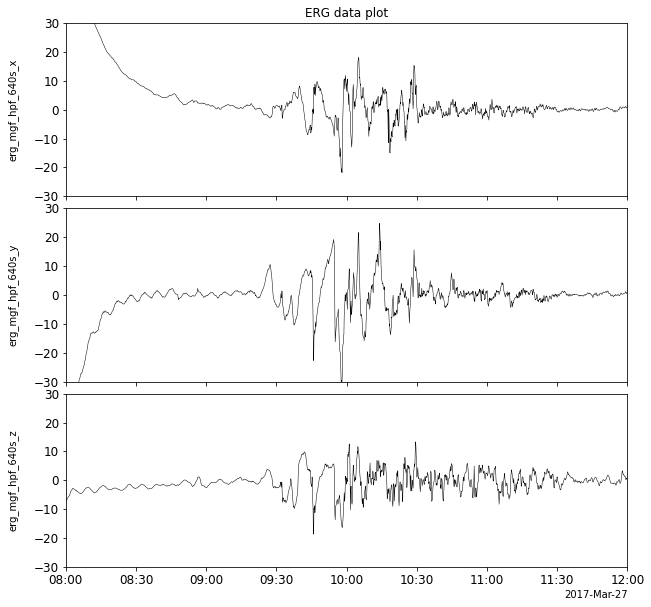

In [86]:
vars = pytplot.split_vec('erg_mgf_hpf_640s')
options( vars, 'yrange', [-30,30])
tplot( vars, xsize=12 )

`char_size` attribute sets the size of characters written axis labels. Larger numbers mean larger sizes. 

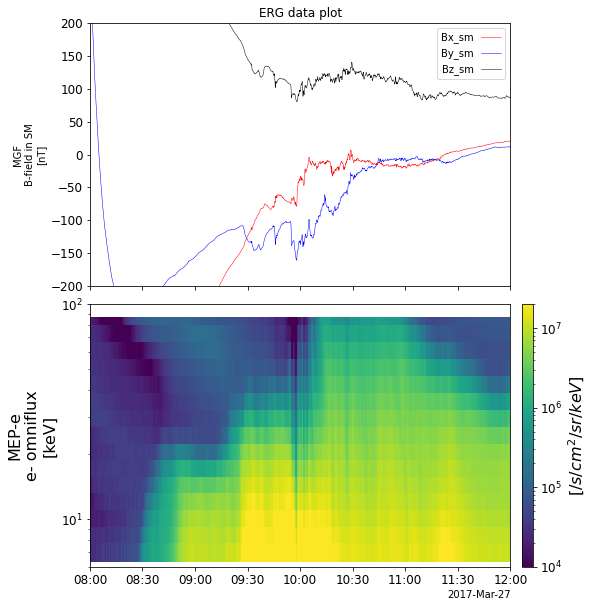

In [87]:
options('erg_mepe_l2_omniflux_FEDO','char_size', 16)
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'])

`axis_font_size` attribute sets the size of characters put along axes. 


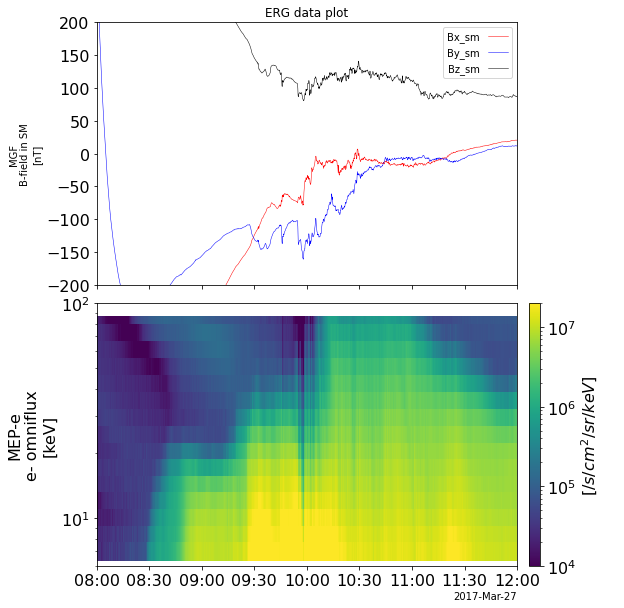

In [88]:
pytplot.tplot_options('axis_font_size', 16)
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'])

Similar to char_size and axis_font_size, `legend_size` sets the character size for legends. 

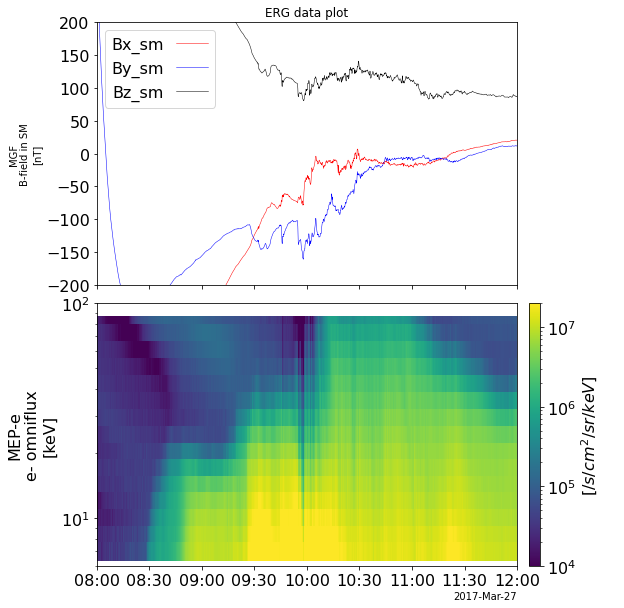

In [89]:
options('erg_mgf_l2_mag_8sec_sm', 'legend_size', 16)
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'])

By setting `legend_location`, you can draw legends on the right side of a plot, or at an appropriate place in a plot panel. 

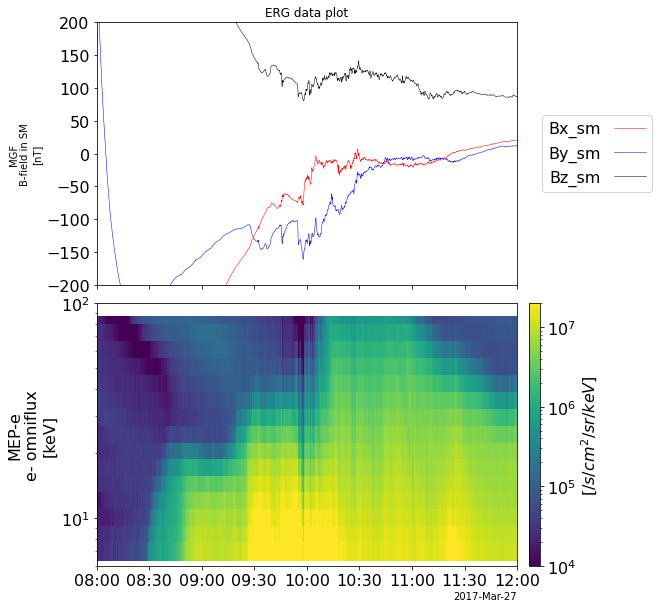

In [90]:
options('erg_mgf_l2_mag_8sec_sm', 'legend_location', 'spedas')
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'])

options('erg_mgf_l2_mag_8sec_sm', 'legend_location', 'best')  ## automatically located inside a plot panel. 



---
# Miscellaneous commands



## Save a plot in picture files. 

Using `save_png` keyword, you can save a plot in a PNG file. 

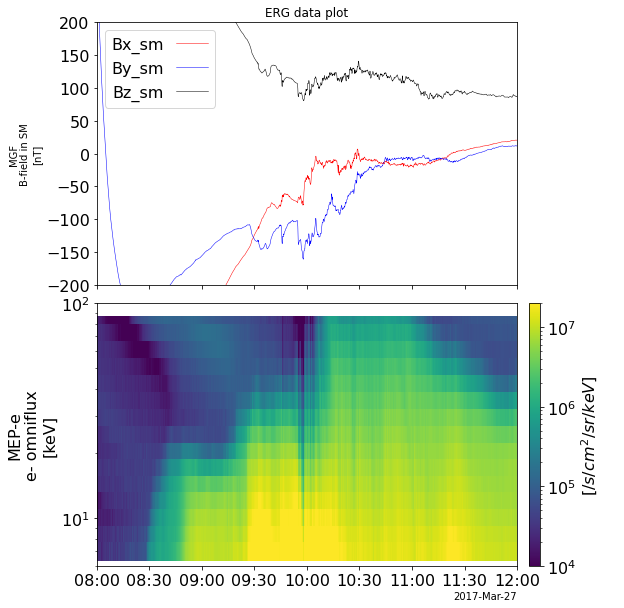

In [91]:
tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'], save_png='mgf_mepe_plot')
# tplot(['erg_mgf_l2_mag_8sec_sm','erg_mepe_l2_omniflux_FEDO'], save_pdf='mgf_mepe_plot')  ## It works, but the resultant PDF is too big in file size. 

## Unify the time labels of two tplot variables by interpolation

pyspedas.tinterpol() interpolates data values of the first variable to times in the second variable. The following example is to interpolate the electron density values (with 1-min resolution) of PWE/HFA data to time labels of the MGF data (with 8-s resolution). 

In [92]:
pyspedas.tinterpol('erg_pwe_hfa_l3_1min_ne_mgf', 'erg_mgf_l2_mag_8sec_sm', method='linear' )
# method: 'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'previous', 'next'  (Default: linear)


tinterpol (linear) was applied to: erg_pwe_hfa_l3_1min_ne_mgf-itrp


## Subtract the average/median from data values of a tplot variable

`subtract_average()` and `subtract_median()` subtracts the average or median from the data values and the resultant data is saven in a separate variable. 

In [93]:
pyspedas.subtract_average( 'erg_mgf_l2_mag_8sec_sm' )
pyspedas.subtract_median( 'erg_mgf_l2_mag_8sec_sm' )


erg_mgf_l2_mag_8sec_sm copied to erg_mgf_l2_mag_8sec_sm-d
Subtract Mean was applied to: erg_mgf_l2_mag_8sec_sm-d
erg_mgf_l2_mag_8sec_sm copied to erg_mgf_l2_mag_8sec_sm-m
Subtract Median was applied to: erg_mgf_l2_mag_8sec_sm-m




---


# The internal structure of tplot variables


`get_data()` returns a taple containing an array of time labels and that of data in a tplot variable. Each element of the taple is a numpy array. 


Basically the entire data and attributes of a tplot variable is held on memory as a Xarray DataArray object. By setting `xarray` keyword to True in get_data(), you can obtain the Xarray object of a tplot variable. 


In [94]:
tvar = pytplot.get_data('erg_mgf_l2_mag_8sec_sm')
tvar
#time, data = pytplot.get_data('erg_mgf_l2_mag_8sec_sm')
#time, data


variable(times=array([1.49048640e+09, 1.49048640e+09, 1.49048641e+09, ...,
       1.49065917e+09, 1.49065918e+09, 1.49065919e+09]), y=array([[ -4.84148645, -27.20098906, 174.16721801],
       [ -4.88376561, -26.82811983, 174.52345086],
       [ -4.82077771, -26.69901797, 174.68817152],
       ...,
       [  5.25403743,  19.34393316, 208.26594567],
       [  5.31039019,  19.57694809, 208.47570839],
       [  5.35093915,  19.81316376, 208.86482972]]))

In [95]:
xr = pytplot.get_data('erg_mgf_l2_mag_8sec_sm', xarray=True)
xr

<xarray.DataArray 'erg_mgf_l2_mag_8sec_sm' (time: 21624, v_dim: 3)>
array([[ -4.84148645, -27.20098906, 174.16721801],
       [ -4.88376561, -26.82811983, 174.52345086],
       [ -4.82077771, -26.69901797, 174.68817152],
       ...,
       [  5.25403743,  19.34393316, 208.26594567],
       [  5.31039019,  19.57694809, 208.47570839],
       [  5.35093915,  19.81316376, 208.86482972]])
Coordinates:
  * time     (time) float64 1.49e+09 1.49e+09 1.49e+09 ... 1.491e+09 1.491e+09
Dimensions without coordinates: v_dim
Attributes:
    CDF:           {'VATT': {'FIELDNAM': 'B in SM', 'CATDESC': '8 sec resolut...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...